In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('balabit_features_training.csv')

In [5]:
columns_to_include = [
    'mean_v', 'sd_v', 'max_v', 'min_v',
    'mean_vx', 'sd_vx', 'max_vx', 'min_vx',
    'mean_vy', 'sd_vy', 'max_vy', 'min_vy',
    'mean_a', 'sd_a', 'max_a', 'min_a',
    'mean_jerk', 'sd_jerk', 'max_jerk', 'min_jerk',
    'direction_of_movement'
]

In [6]:
data_selected = data[columns_to_include]

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

In [8]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

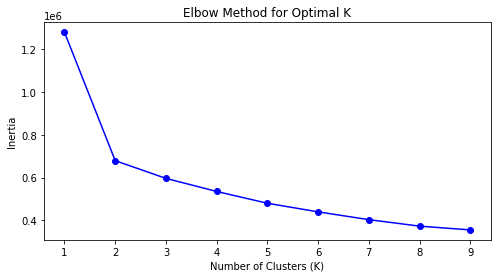

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [25]:
optimal_k = 10# This should be chosen based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

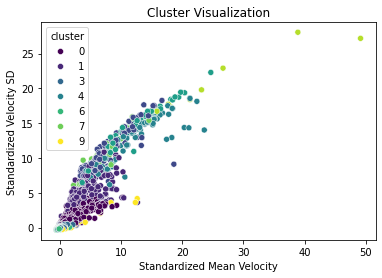

In [26]:
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Standardized Mean Velocity')
plt.ylabel('Standardized Velocity SD')
plt.show()

In [27]:
data.to_csv('clustered_data_with_stats.csv', index=False)

In [43]:
testing_data = pd.read_csv('balabit_features_test.csv')

In [44]:
testing_data_selected = testing_data[columns_to_include]

In [45]:
scaled_testing_data = scaler.transform(testing_data_selected)

In [46]:
testing_data['predicted_cluster'] = kmeans.predict(scaled_testing_data)

In [47]:
def detect_bot(row, kmeans):
    # Calculate the distance to each cluster center
    distances = kmeans.transform([row])[0]
    # If the minimum distance is greater than a threshold, classify as a bot
    threshold = 1.5  # Adjust this threshold based on your use case
    return 1 if distances.min() > threshold else 0

In [ ]:
testing_data['is_bot'] = testing_data_selected.apply(detect_bot, axis=1, kmeans=kmeans)

In [42]:
testing_data.to_csv('tested_data_with_bot_detection1.csv', index=False)